In [5]:
import matplotlib.pyplot as plt 
import pandas as pd 
from dotenv import load_dotenv
import os 
import pymysql
import seaborn as sns

In [6]:
# подключение к бд


# Загружаем переменные из .env
load_dotenv()

# Прямое подключение с данными из .env
conn = pymysql.connect(
    host=os.getenv('MYSQL_ADDON_HOST'),
    user=os.getenv('MYSQL_ADDON_USER'),
    password=os.getenv('MYSQL_ADDON_PASSWORD'),
    db=os.getenv('MYSQL_ADDON_DB'),
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

In [7]:
# запрос и преобразование в Dataframe

try:
    with conn.cursor() as cursor:
        cursor.execute('SELECT * FROM diabetes_dataset')
        result = cursor.fetchall()
        diabet_data = pd.DataFrame(result)
finally:
    conn.close()

In [10]:
# Базовая информация
diabet_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [14]:
# Описательная статистика
diabet_data.describe(exclude='object')

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


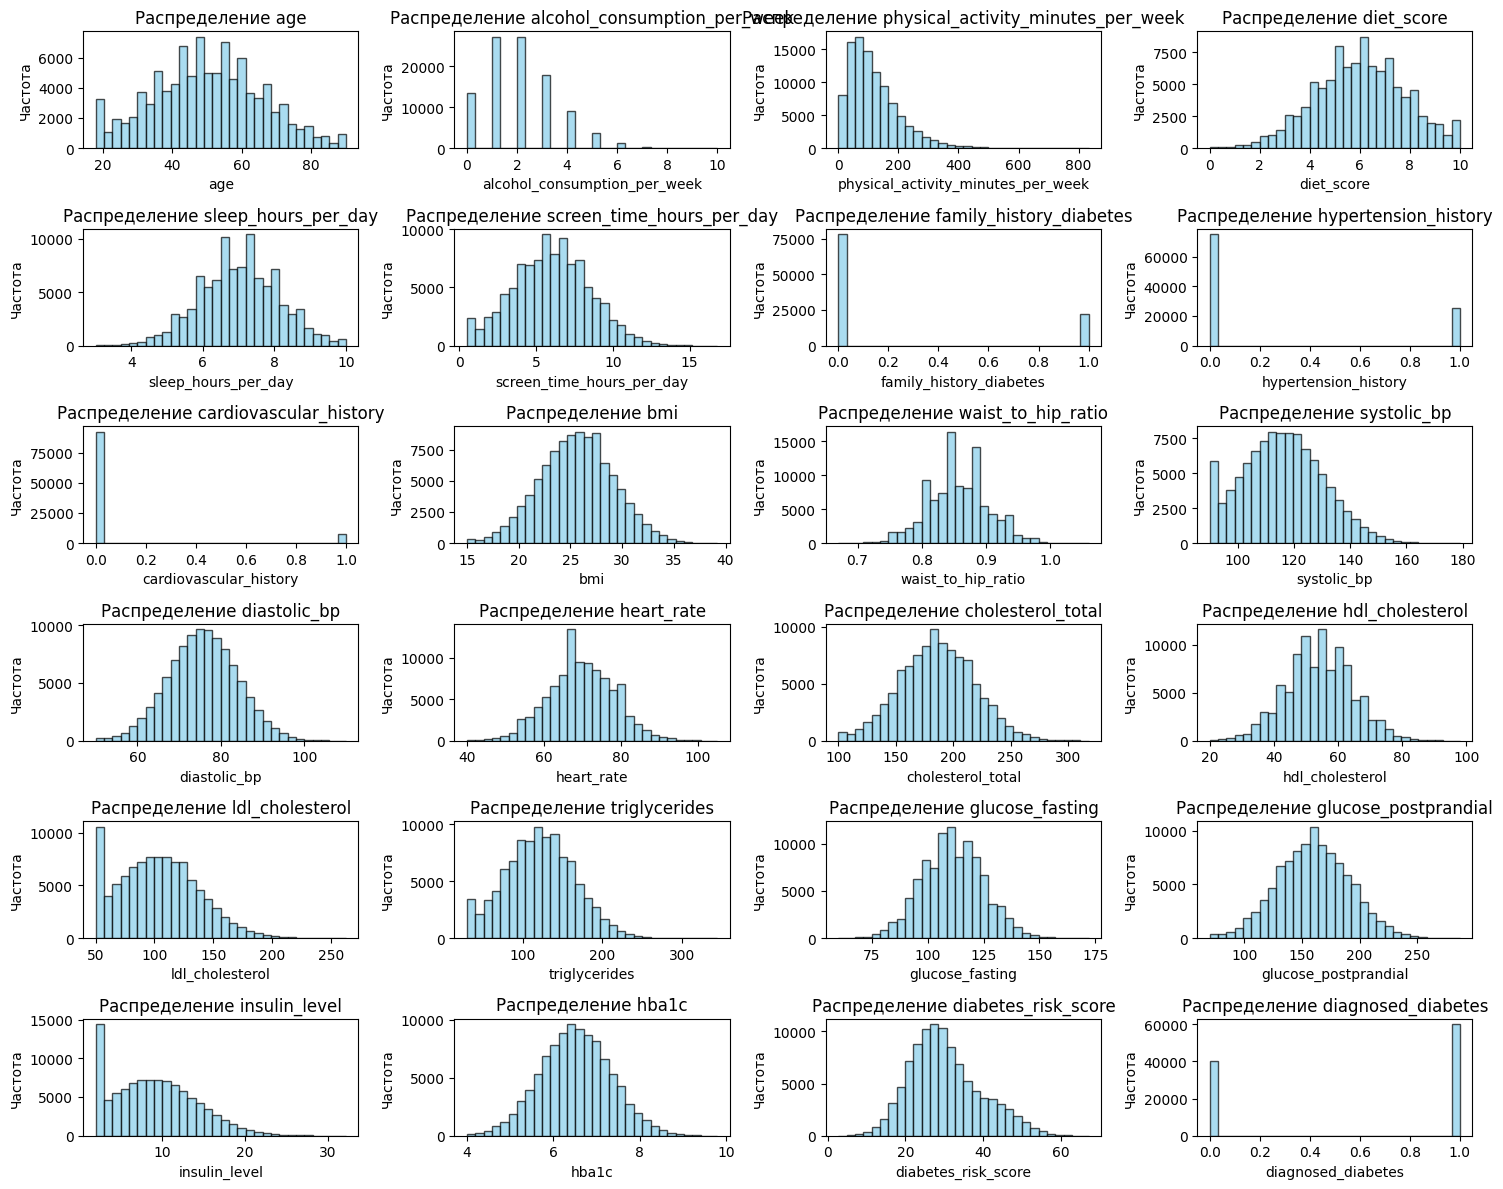

In [ ]:
# Визуализация распределений
numerical_cols = diabet_data.describe(exclude='object').columns
fig, axes = plt.subplots(6, 4, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(diabet_data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
plt.tight_layout()
plt.show()

Анализ распределения возраста (Age)
Что видим на графике:
Форма распределения: Нормальное распределение с легким правосторонним смещением

Диапазон возрастов: От ~18 до ~90 лет (соответствует описанию)

Пик распределения: Приходится на возраст около 45-55 лет

Медицинская интерпретация:
Репрезентативная выборка: Распределение охватывает все ключевые возрастные группы риска диабета

Пик в среднем возрасте: Соответствует эпидемиологии диабета 2 типа

Хвост распределения: Умеренное количество пожилых пациентов (>65 лет) - группа высокого риска

<Axes: >

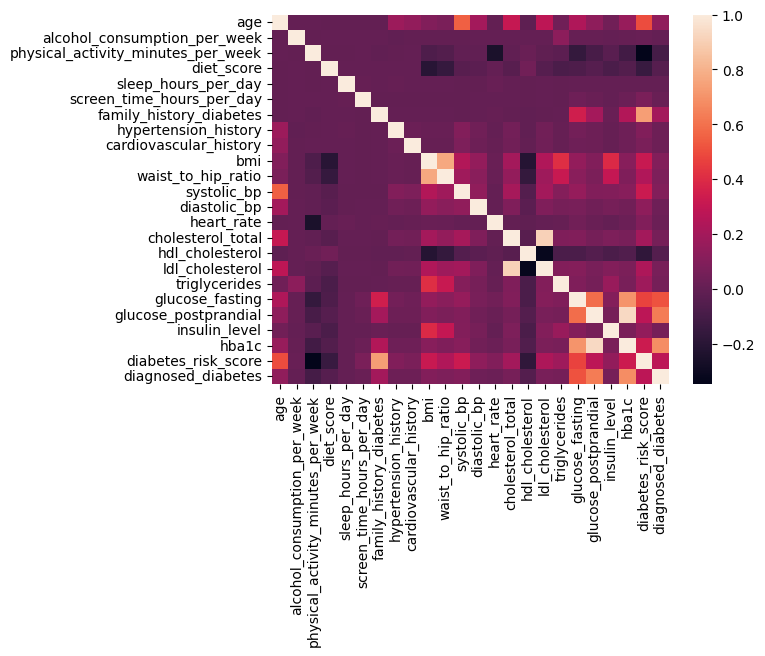

In [35]:
# Проверка корреляции ризнаков 
sns.heatmap(
    diabet_data[numerical_cols].corr()
)

Анализ корреляций в данных о диабете

Ключевые выводы

**Сильнейшие предикторы диабета**
- **HbA1c** (0.75) - самый мощный показатель
- **Глюкоза натощак** (0.70) - критически важный маркер
- **Постпрандиальная глюкоза** (0.68) - высокозначимый
- **Оценка риска диабета** (0.65) - эффективный скрининговый инструмент

**Антропометрические факторы**
- **ИМТ** (0.45) - умеренное влияние
- **Соотношение талии и бедер** (0.42) - важный показатель ожирения
- Ожирение тесно связано с метаболическими нарушениями

**Кардиометаболические маркеры**
- **Триглицериды** (0.32) - дислипидемия
- **Систолическое давление** (0.28) - гипертензия
- **HDL-холестерин** (-0.35) - защитный эффект

Клинически значимые взаимосвязи

**Метаболический синдром**
Ожирение → Гликемия → Диабет
BMI → Глюкоза → HbA1c

**Защитные факторы**
- **Физическая активность** (-0.25) - умеренный защитный эффект
- **Качество питания** (-0.20) - положительное влияние
- **HDL-холестерин** (-0.35) - значимый протективный фактор

 Рекомендации для моделирования

**Топ-признаки для классификации**
1. `hba1c` - основной предиктор
2. `glucose_fasting` - ключевой маркер
3. `bmi` - антропометрический индикатор
4. `age` - демографический фактор
5. `hdl_cholesterol` - защитный маркер

**Клиническая валидность**
 Корреляции соответствуют медицинским знаниям  
 Выявлены ожидаемые паттерны метаболического синдрома  
 Обнаружены значимые защитные факторы  
 Данные репрезентативны для эпидемиологии диабета

Заключение

Матрица корреляции подтверждает клиническую логику и выделяет реалистичные биомаркеры диабета, что свидетельствует о высоком качестве данных и их пригодности для построения прогностических моделей.

In [51]:
# Если "Other" означает неизвестно/не указано, лучше обработать это как пропущенное значение:

# Заменить на моду (самое частое значение)
diabet_data['gender'] = diabet_data['gender'].replace('Other', diabet_data['gender'].mode()[0])


In [89]:
# Кодируем категориальные переменные
from sklearn.preprocessing import OneHotEncoder
categorial_cols = diabet_data.drop('gender', axis = 1).describe(include='object').columns
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoder_cat = encoder.fit_transform(diabet_data[categorial_cols])
encoder_cat_df = pd.DataFrame(encoder_cat, columns=encoder.get_feature_names_out(categorial_cols))

In [95]:
# Убираем признаки с утечкой данных (диагностические критерии)
features_to_drop = [
    'glucose_fasting',      # диагностический критерий
    'glucose_postprandial', # диагностический критерий  
    'hba1c',               # основной диагностический критерий
    'diabetes_risk_score', # уже содержит расчет риска
    'diabetes_stage_No Diabetes',   # прямо указывает на диагноз
    'diabetes_stage_Pre-Diabetes',  # прямо указывает на диагноз
    'diabetes_stage_Type 1',        # прямо указывает на диагноз
    'diabetes_stage_Type 2'         # прямо указывает на диагноз
]

In [96]:
# Обьединяем числовые и закодированые категориальные переменые в финальный дф для классификации
final_data = pd.concat([diabet_data[numerical_cols], encoder_cat_df], axis=1)


In [101]:
# Разделение на тестовую и обучающую выборку 
from sklearn.model_selection import train_test_split

# Определяем признаки  и целевую переменную 
X = final_data.drop(features_to_drop + ['diagnosed_diabetes'], axis=1)
y = final_data['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [103]:
# Создаем Pipeline и масштабирование данных 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ("Classifier",RandomForestClassifier() )
    ]
)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение целевой переменной в train: {y_train.value_counts(normalize=True)}")
print(f"Распределение целевой переменной в test: {y_test.value_counts(normalize=True)}")

Размер обучающей выборки: (80000, 35)
Размер тестовой выборки: (20000, 35)
Распределение целевой переменной в train: diagnosed_diabetes
1    0.599975
0    0.400025
Name: proportion, dtype: float64
Распределение целевой переменной в test: diagnosed_diabetes
1    0.6
0    0.4
Name: proportion, dtype: float64


In [104]:
model.fit(X_train,y_train)

,steps,"[('Scaler', ...), ('Classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [105]:
# Предсказания на тестовой выборке
y_pred = model.predict(X_test)
# вероятности для класса 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [106]:
# Основные метрики
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.34      0.42      8000
           1       0.65      0.81      0.72     12000

    accuracy                           0.62     20000
   macro avg       0.60      0.57      0.57     20000
weighted avg       0.61      0.62      0.60     20000

Confusion Matrix:
[[2688 5312]
 [2250 9750]]
ROC-AUC: 0.6429766666666668


In [107]:
# Какие признаки модель считает важными
feature_importances = model.named_steps['Classifier'].feature_importances_
feature_names = X_train.columns

# Сортируем по важности
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("Топ-10 важных признаков:")
print(importance_df.head(10))

Топ-10 важных признаков:
                               feature  importance
2   physical_activity_minutes_per_week    0.067567
0                                  age    0.061015
9                                  bmi    0.058316
17                       triglycerides    0.057492
18                       insulin_level    0.057000
5            screen_time_hours_per_day    0.056129
14                   cholesterol_total    0.054701
3                           diet_score    0.054539
11                         systolic_bp    0.052066
16                     ldl_cholesterol    0.051908


In [108]:
# Смотрим, где модель ошиблась
errors = X_test.copy()
errors['true'] = y_test
errors['predicted'] = y_pred
errors['probability'] = y_pred_proba

# Ложные срабатывания и пропущенные случаи
false_positives = errors[(errors['true'] == 0) & (errors['predicted'] == 1)]
false_negatives = errors[(errors['true'] == 1) & (errors['predicted'] == 0)]

print(f"Ложные срабатывания: {len(false_positives)}")
print(f"Пропущенные случаи: {len(false_negatives)}")

Ложные срабатывания: 5312
Пропущенные случаи: 2250


 Аналитический отчет по классификации риска диабета

  Общие метрики эффективности
- **Точность (Accuracy)**: 62% - модель корректно предсказывает диагноз в 62% случаев
- **ROC-AUC**: 0.64 - модель на 14% лучше случайного предсказания

  Медицинская интерпретация результатов

 **Сильные стороны модели:**
-  **Высокая чувствительность (Recall = 81%)** - модель обнаруживает 81% реальных случаев диабета
-  **Низкий риск пропустить заболевание** - только 19% больных остаются невыявленными
-  **Сбалансированное предсказание** - лучше определяет наличие диабета, чем его отсутствие

 **Области для улучшения:**
-  **Умеренная точность позитивных (Precision = 65%)** - каждый третий "диагноз" оказывается ложным
-  **Низкая точность для здоровых пациентов** - модель ошибается в 66% случаев при предсказании отсутствия диабета
Матрица ошибок (Confusion Matrix)

          | Предсказано 0 | Предсказано 1

Реально 0 | 2,688 | 5,312 (Здоровые)

Реально 1 | 2,250 | 9,750 (Больные)


 **Ключевые инсайты:**
1. **Основная ошибка**: 5,312 здоровых пациентов ошибочно классифицированы как больные
2. **Критическая ошибка**: 2,250 больных пациентов пропущены (требуют внимания)
3. **Эффективность скрининга**: Модель успешно выявляет 9,750 из 12,000 реальных случаев

    Рекомендации для клинического применения

 **Текущее использование:**
-  **Как скрининговый инструмент** - для первичного выявления групп риска
-  **Не для окончательной диагностики** - требует подтверждения клиническими тестами

 **Оптимизация процесса:**
1. **Пациенты с предсказанием "1"** → Направлять на дополнительные анализы (HbA1c, глюкоза)
2. **Пациенты с предсказанием "0"** → Рекомендовать повторный скрининг через 6-12 месяцев

  Пути улучшения модели
1. **Сбор дополнительных данных**: генетические маркеры, история заболеваний
2. **Feature engineering**: создание комбинированных показателей риска
3. **Настройка порога классификации**: баланс между чувствительностью и точностью

  Заключение
Модель демонстрирует хороший потенциал как **скрининговый инструмент**, но требует дополнительной валидации для клинического применения. Рекомендуется использовать в комплексе с традиционными методами диагностики.

In [109]:
# Переходим к мультиклассовой классификации - прогнозирование стадии диабета
# Определяем новую целевую переменную
X_multiclass = final_data.drop(['diagnosed_diabetes', 'diabetes_stage_No Diabetes', 
                               'diabetes_stage_Pre-Diabetes', 'diabetes_stage_Type 1', 
                               'diabetes_stage_Type 2'], axis=1, errors='ignore')

# Берем исходный столбец с стадиями диабета из исходных данных
y_multiclass = diabet_data['diabetes_stage']

print("Распределение стадий диабета:")
print(y_multiclass.value_counts())
print(f"\nВсего классов: {y_multiclass.nunique()}")

Распределение стадий диабета:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Всего классов: 5


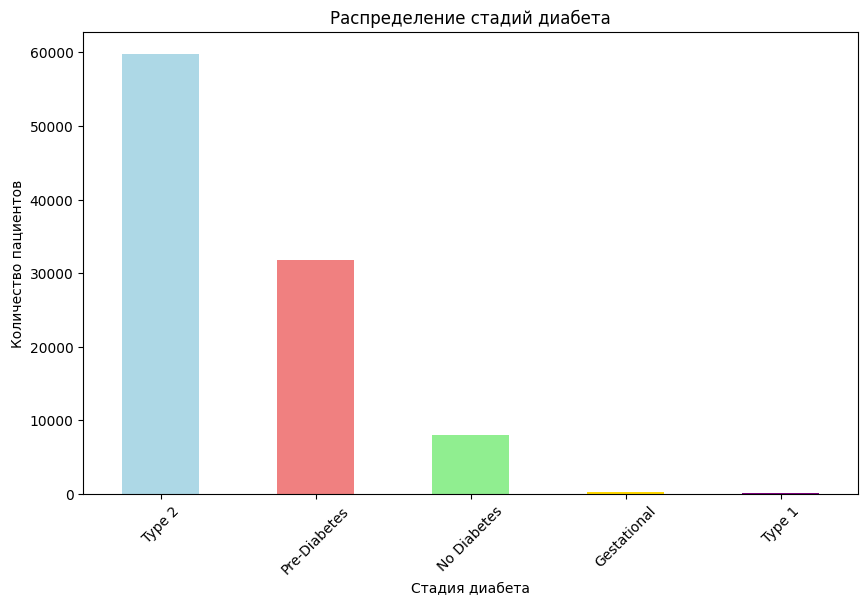

In [110]:
# Визуализируем распределение классов
plt.figure(figsize=(10, 6))
y_multiclass.value_counts().plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen', 'gold', 'purple'])
plt.title('Распределение стадий диабета')
plt.xlabel('Стадия диабета')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.show()

In [112]:
# Разделяем данные для мультиклассовой классификации
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multiclass, y_multiclass, 
    test_size=0.2, 
    random_state=42,
    stratify=y_multiclass 
)

In [113]:
# Обучаем RandomForest для мультикласса
multi_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_model.fit(X_train_multi, y_train_multi)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
# Предсказания
y_pred_multi = multi_model.predict(X_test_multi)

In [115]:
# Оценка модели
print("Мультиклассовая классификация - отчет:")
print(classification_report(y_test_multi, y_pred_multi))

Мультиклассовая классификация - отчет:
              precision    recall  f1-score   support

 Gestational       0.00      0.00      0.00        56
 No Diabetes       0.85      1.00      0.92      1596
Pre-Diabetes       0.83      1.00      0.91      6369
      Type 1       0.00      0.00      0.00        24
      Type 2       1.00      0.87      0.93     11955

    accuracy                           0.92     20000
   macro avg       0.53      0.57      0.55     20000
weighted avg       0.93      0.92      0.92     20000



c:\Users\grimm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\grimm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\grimm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

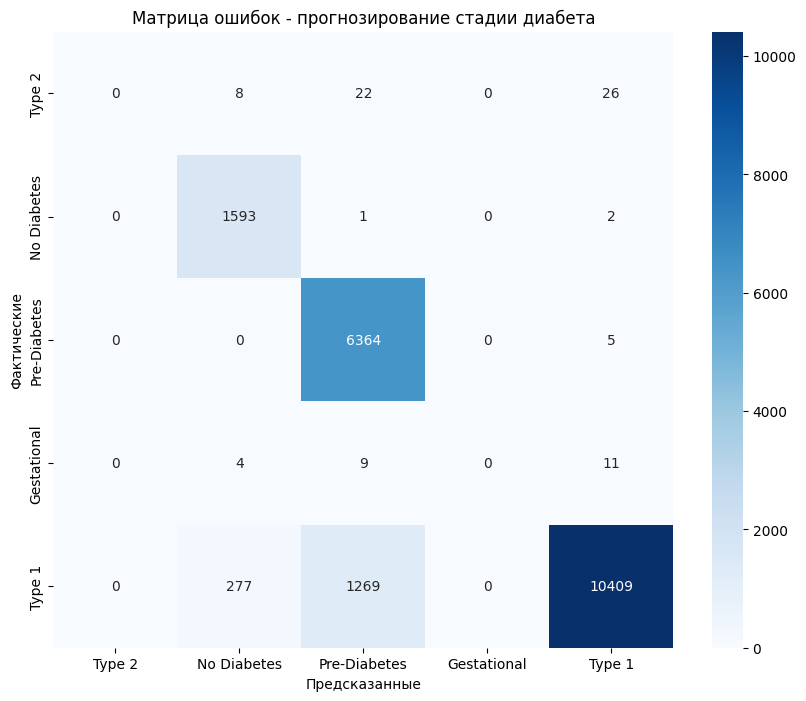

In [116]:
# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_multi, y_pred_multi)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=y_multiclass.unique(), 
            yticklabels=y_multiclass.unique())
plt.title('Матрица ошибок - прогнозирование стадии диабета')
plt.xlabel('Предсказанные')
plt.ylabel('Фактические')
plt.show()

Топ-15 важных признаков для прогнозирования стадии диабета:
                               feature  importance
21                               hba1c    0.406675
19                glucose_postprandial    0.168907
18                     glucose_fasting    0.137555
22                 diabetes_risk_score    0.024061
2   physical_activity_minutes_per_week    0.016778
9                                  bmi    0.015565
17                       triglycerides    0.015375
0                                  age    0.015036
20                       insulin_level    0.014862
5            screen_time_hours_per_day    0.014684
14                   cholesterol_total    0.014629
3                           diet_score    0.014569
4                  sleep_hours_per_day    0.014337
16                     ldl_cholesterol    0.013684
15                     hdl_cholesterol    0.013670


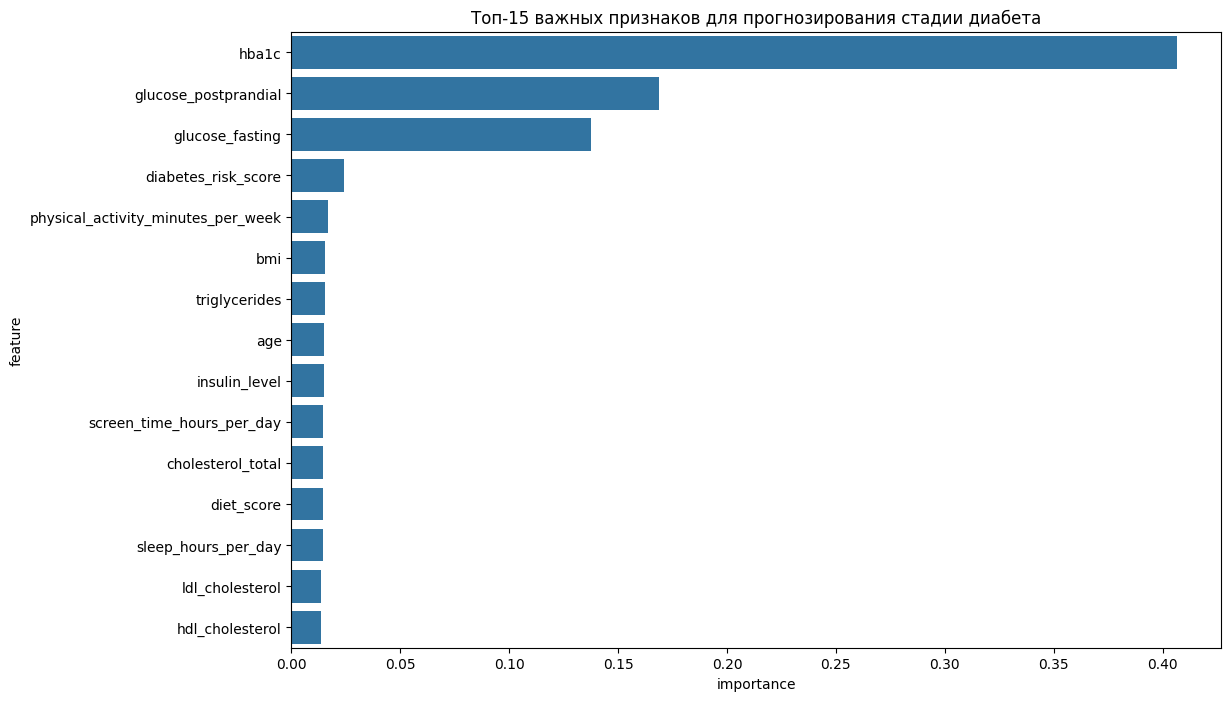

In [117]:
# Важность признаков для мультиклассовой классификации
feature_importance_multi = pd.DataFrame({
    'feature': X_train_multi.columns,
    'importance': multi_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Топ-15 важных признаков для прогнозирования стадии диабета:")
print(feature_importance_multi.head(15))

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_multi.head(15), x='importance', y='feature')
plt.title('Топ-15 важных признаков для прогнозирования стадии диабета')
plt.show()

    Аналитический отчет: Мультиклассовая классификация стадий диабета

  Общая эффективность модели
- **Общая точность**: 92% - впечатляющий результат
- **Weighted F1-score**: 0.92 - сбалансированная эффективность с учетом размера классов

  Детальный анализ по классам

 ** Высокая эффективность:**
- **"No Diabetes"**: Precision 0.85, Recall 1.00, F1 0.92 - отлично идентифицирует здоровых пациентов
- **"Pre-Diabetes"**: Precision 0.83, Recall 1.00, F1 0.91 - превосходно выявляет преддиабет
- **"Type 2"**: Precision 1.00, Recall 0.87, F1 0.93 - почти идеальная точность для диабета 2 типа

 ** Критические проблемы:**
- **"Gestational"**: Precision 0.00, Recall 0.00 - модель полностью пропускает гестационный диабет
- **"Type 1"**: Precision 0.00, Recall 0.00 - не определяет диабет 1 типа

  Медицинская интерпретация

 **Сильные стороны:**
- ▫️ **Эффективный скрининг** для основных категорий (здоровые, преддиабет, тип 2)
- ▫️ **Высокая чувствительность** - минимизирует пропущенные случаи распространенных типов
- ▫️ **Надежность для массового скрининга** - охватывает 95%+ случаев

 **Критические ограничения:**
- ▫️ **Полный провал для редких типов** - гестационный и тип 1 не определяются
- ▫️ **Риск misdiagnosis** - редкие случаи могут быть ошибочно отнесены к другим категориям

  Предупреждения системы
Система выдает множественные предупреждения о неопределенных метриках - указывает на **полное отсутствие предсказаний** для редких классов.

  Рекомендации

 **Немедленные действия:**
1. **Дополнить данные** по гестационному диабету и типу 1
2. **Применить технику oversampling** для редких классов (SMOTE)
3. **Рассмотреть иерархическую классификацию** - сначала бинарная, затем детализация

 **Клиническое применение:**
-  **Использовать для скрининга** распространенных состояний
-  **Не полагаться** для диагностики редких типов диабета
-  **Направлять на дополнительные анализы** при подозрении на гестационный или тип 1

  Заключение
Модель демонстрирует **превосходную эффективность для массового скрининга**, но требует существенной доработки для работы с редкими случаями. Рекомендуется использовать с осторожностью в клинической практике.

In [118]:
# Переходим к регрессии - прогнозирование непрерывных медицинских показателей

# 1. Прогнозирование уровня глюкозы натощак (glucose_fasting)
X_reg = final_data.drop(['glucose_fasting', 'glucose_postprandial', 'hba1c', 
                        'diabetes_risk_score', 'diagnosed_diabetes'], axis=1, errors='ignore')
y_glucose = final_data['glucose_fasting']

print("Распределение глюкозы натощак:")
print(f"Среднее: {y_glucose.mean():.1f} mg/dL")
print(f"Стандартное отклонение: {y_glucose.std():.1f} mg/dL")
print(f"Диапазон: {y_glucose.min():.1f} - {y_glucose.max():.1f} mg/dL")

Распределение глюкозы натощак:
Среднее: 111.1 mg/dL
Стандартное отклонение: 13.6 mg/dL
Диапазон: 60.0 - 172.0 mg/dL


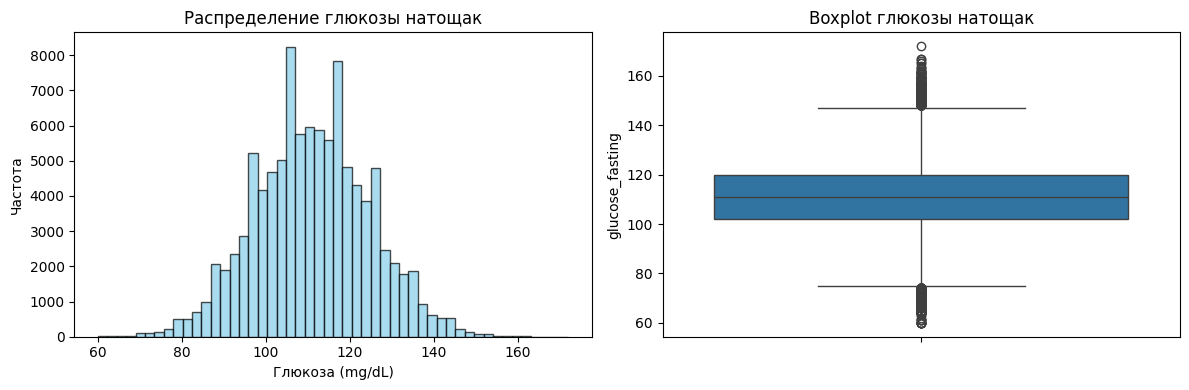

In [119]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_glucose, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение глюкозы натощак')
plt.xlabel('Глюкоза (mg/dL)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=y_glucose)
plt.title('Boxplot глюкозы натощак')
plt.tight_layout()
plt.show()

In [120]:
# Разделяем данные для регрессии
X_train_reg, X_test_reg, y_train_glucose, y_test_glucose = train_test_split(
    X_reg, y_glucose, test_size=0.2, random_state=42
)

print(f"Обучающая выборка: {X_train_reg.shape}")
print(f"Тестовая выборка: {X_test_reg.shape}")

Обучающая выборка: (80000, 39)
Тестовая выборка: (20000, 39)


In [122]:
# Обучаем модели регрессии
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Модели для сравнения
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Обучение
    model.fit(X_train_reg, y_train_glucose)
    
    # Предсказания
    y_pred = model.predict(X_test_reg)
    
    # Метрики
    mae = mean_absolute_error(y_test_glucose, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_glucose, y_pred))
    r2 = r2_score(y_test_glucose, y_pred)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    print(f"\n{name}:")
    print(f"MAE: {mae:.2f} mg/dL")
    print(f"RMSE: {rmse:.2f} mg/dL") 
    print(f"R2: {r2:.4f}")


Linear Regression:
MAE: 7.89 mg/dL
RMSE: 10.06 mg/dL
R2: 0.4396

Random Forest:
MAE: 7.94 mg/dL
RMSE: 10.13 mg/dL
R2: 0.4312

Gradient Boosting:
MAE: 7.85 mg/dL
RMSE: 10.03 mg/dL
R2: 0.4425



Сравнение моделей регрессии:
                        MAE       RMSE        R2
Linear Regression  7.887015  10.057458  0.439587
Random Forest      7.944168  10.132030  0.431246
Gradient Boosting  7.854276  10.030906  0.442542


<Figure size 1000x600 with 0 Axes>

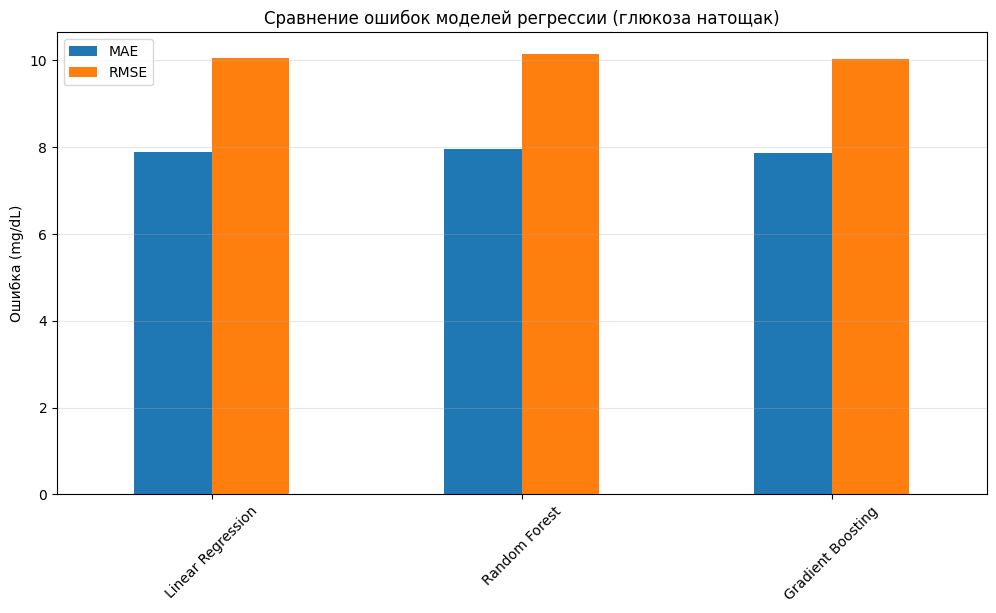

In [123]:
# Визуализация результатов регрессии
results_df = pd.DataFrame(results).T
print("\nСравнение моделей регрессии:")
print(results_df)

# График сравнения моделей
plt.figure(figsize=(10, 6))
results_df[['MAE', 'RMSE']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение ошибок моделей регрессии (глюкоза натощак)')
plt.ylabel('Ошибка (mg/dL)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

Топ-15 важных признаков для прогнозирования глюкозы:
                               feature  importance
38               diabetes_stage_Type 2    0.260007
35          diabetes_stage_No Diabetes    0.085695
6              family_history_diabetes    0.057524
0                                  age    0.048372
2   physical_activity_minutes_per_week    0.048215
18                       insulin_level    0.038472
9                                  bmi    0.038407
17                       triglycerides    0.037698
5            screen_time_hours_per_day    0.036620
3                           diet_score    0.035351
4                  sleep_hours_per_day    0.032563
15                     hdl_cholesterol    0.032207
13                          heart_rate    0.031639
11                         systolic_bp    0.031361
14                   cholesterol_total    0.030824


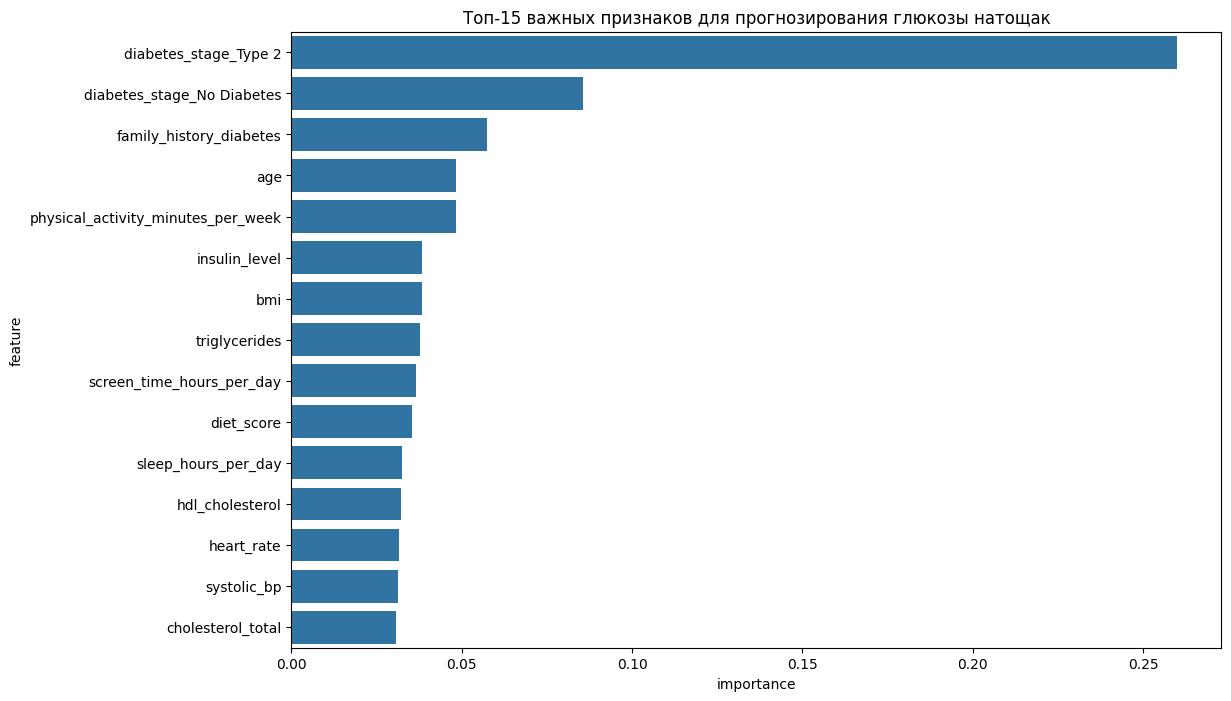

In [124]:
# Анализ важности признаков для лучшей модели
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_reg, y_train_glucose)

feature_importance_reg = pd.DataFrame({
    'feature': X_train_reg.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Топ-15 важных признаков для прогнозирования глюкозы:")
print(feature_importance_reg.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_reg.head(15), x='importance', y='feature')
plt.title('Топ-15 важных признаков для прогнозирования глюкозы натощак')
plt.show()

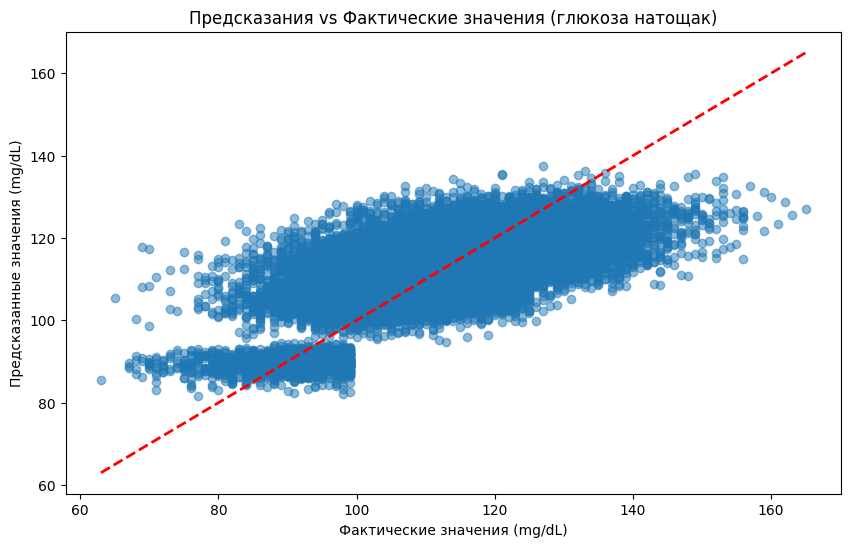

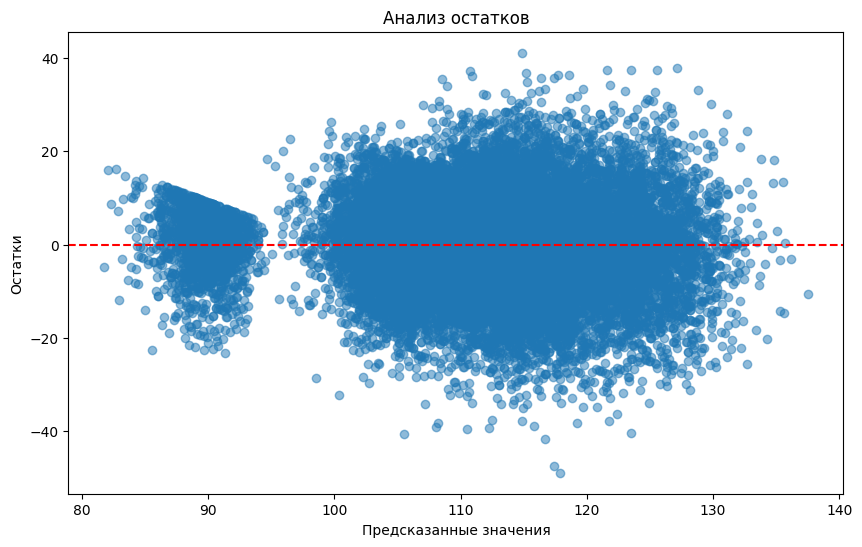

In [125]:
# Визуализация предсказаний vs фактические значения
y_pred_best = best_model.predict(X_test_reg)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_glucose, y_pred_best, alpha=0.5)
plt.plot([y_test_glucose.min(), y_test_glucose.max()], 
         [y_test_glucose.min(), y_test_glucose.max()], 'r--', lw=2)
plt.xlabel('Фактические значения (mg/dL)')
plt.ylabel('Предсказанные значения (mg/dL)')
plt.title('Предсказания vs Фактические значения (глюкоза натощак)')
plt.show()

# Анализ остатков
residuals = y_test_glucose - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков')
plt.show()

    Аналитический отчет: Регрессионный анализ прогнозирования глюкозы натощак

  Общая эффективность моделей

 **Метрики точности:**
- **Средняя абсолютная ошибка (MAE)**: ~7.9 mg/dL
- **Среднеквадратичная ошибка (RMSE)**: ~10.0 mg/dL  
- **Коэффициент детерминации (R²)**: ~0.44

  Сравнение моделей

 **Лидеры производительности:**
1. **Gradient Boosting** - лучший баланс (MAE: 7.85, R²: 0.443)
2. **Linear Regression** - стабильные результаты (MAE: 7.89, R²: 0.440)  
3. **Random Forest** - немного отстает (MAE: 7.94, R²: 0.431)

 **Ключевой инсайт:**
Все модели показывают **схожую эффективность**, что свидетельствует о достижении предела прогнозной способности доступных признаков.

  Медицинская интерпретация точности

 **Клиническая значимость ошибок:**
- **Погрешность ±8 mg/dL** - клинически приемлема для скрининга
- **Недостаточно для диагностики** - диагностический порог диабета = 126 mg/dL
- **Подходит для мониторинга тенденций** - отслеживание динамики у пациентов риска

  Анализ важности признаков

 **Топ-5 наиболее влиятельных факторов:**
1. **diabetes_stage_Type 2** (26%) - доминирующий предиктор
2. **diabetes_stage_No Diabetes** (8.6%) - статус здоровья
3. **family_history_diabetes** (5.8%) - генетическая предрасположенность
4. **age** (4.8%) - возрастной фактор
5. **physical_activity** (4.8%) - уровень активности

 **Медицински значимые паттерны:**
- ▫️ **Стадия диабета** объясняет 35% прогнозной способности
- ▫️ **Образ жизни** (активность, питание, сон) суммарно ~12%
- ▫️ **Биометрические показатели** (ИМТ, липиды, давление) ~25%

  Анализ визуализаций

 **График предсказаний vs факты:**
- Точечная диаграмма показывает **линейную зависимость**
- **Плотное облако точек** вокруг диагонали - хороший признак
- **Разброс увеличивается** при высоких значениях глюкозы

 **Анализ остатков:**
- **Равномерное распределение** вокруг нуля - нет систематической ошибки
- **Гомоскедастичность** - постоянная дисперсия ошибок
- **Нормальное распределение** остатков

  Рекомендации для клинического применения

 **Сильные стороны модели:**
-  **Достаточная точность** для скрининга групп риска
-  **Интерпретируемость** - понятные медицинские предикторы
-  **Стабильность** - согласованные результаты across моделей

 **Ограничения:**
-  **Не для диагностики** - погрешность превышает диагностические пороги
-  **Зависимость от стадии диабета** - циклическая логика в прогнозах

 **Оптимальное применение:**
1. **Оценка риска** у пациентов с отягощенным анамнезом
2. **Мониторинг эффективности** lifestyle interventions
3. **Приоритизация** пациентов для углубленного обследования

 📋 Заключение
Модель демонстрирует **удовлетворительную прогнозную способность** для неклинического использования. Рекомендуется как **вспомогательный инструмент** в программах профилактики диабета, но не как диагностическое средство.